# EDA

Neste notebook, analisámos o nosso dataset, de forma a perceber as features, o contexto, etc.
Acabamos por reduzir o nosso dataset com base na análise.

Alternativamente, e para maior simplicidade, pode-se correr o script extract_reduced.py para opter o dataset.

---

In [123]:
!pip install pandas numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.5 MB/s eta 0:00:00a 0:00:01


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('../data/owid-co2-data.csv')

In [59]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50407 entries, 0 to 50406
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50407 non-null  object 
 1   year                                       50407 non-null  int64  
 2   iso_code                                   42480 non-null  object 
 3   population                                 41167 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 29173 non-null  float64
 6   cement_co2_per_capita                      25648 non-null  float64
 7   co2                                        29384 non-null  float64
 8   co2_growth_abs                             27216 non-null  float64
 9   co2_growth_prct                            26239 non-null  float64
 10  co2_including_luc     

Como podemos ver, temos muitos valores em faltas e muitas variaveis...

In [61]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

Primeiro, vamos perceber quais são as features com maior número de valores em falta:  

In [62]:
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
missing_pct[missing_pct > 0]

share_global_cumulative_other_co2       95.695042
share_global_other_co2                  95.695042
other_co2_per_capita                    94.724939
cumulative_other_co2                    93.544547
other_industry_co2                      93.544547
                                          ...    
share_of_temperature_change_from_ghg    18.660107
temperature_change_from_ghg             18.660107
temperature_change_from_co2             18.660107
population                              18.330787
iso_code                                15.725990
Length: 77, dtype: float64

Portanto, 77 de 79 de features têm valores em falta. 

Uma vez que a data é uma variavel muito importante e que consideramos crucial para o nosso problema, assim como o país, vamos verificar os valores em falta consoante os anos

In [63]:
min_year, max_year = df["year"].min(), df["year"].max()
min_year, max_year

(np.int64(1750), np.int64(2024))

In [64]:
# como temos muitos muitos dados, vamos analisar esta variavel de 10 em 10 anos
df["year_bin"] = pd.cut(df["year"],  bins=range(min_year, max_year + 10, 10))

# calcular % de valores em falta por bin
def percent(x):
    return x.isna().mean() * 100


/tmp/ipykernel_5195/487383369.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_by_bin_col = df.groupby("year_bin")[col].apply(percent)


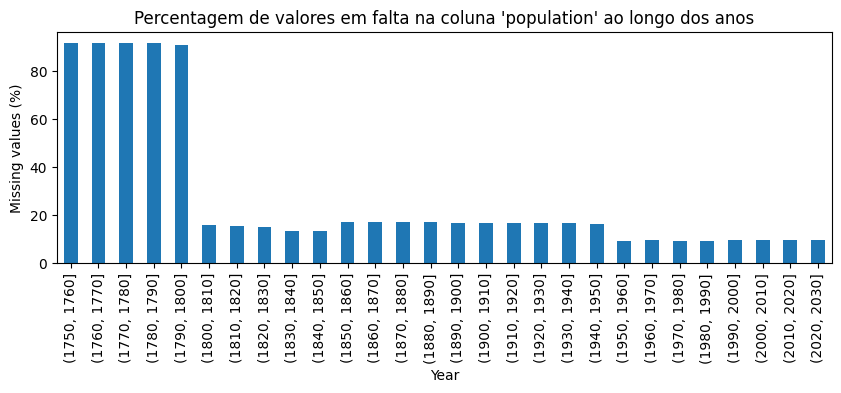

In [65]:
col = "population"   # todas as amostras tem contry

missing_by_bin_col = df.groupby("year_bin")[col].apply(percent)
missing_by_bin_col.plot(kind="bar", figsize=(10,3))
plt.title(f"Percentagem de valores em falta na coluna '{col}' ao longo dos anos")
plt.ylabel("Missing values (%)")
plt.xlabel("Year")
plt.show()

In [66]:
df_v2 = df[df["year"] >= 1800]

In [67]:
missing_pct = df_v2.isna().mean().sort_values(ascending=False) * 100
missing_pct[missing_pct > 0]

share_global_other_co2                  95.430040
share_global_cumulative_other_co2       95.430040
other_co2_per_capita                    94.410749
cumulative_other_co2                    93.463061
other_industry_co2                      93.463061
                                          ...    
iso_code                                14.693370
population                              13.810968
share_of_temperature_change_from_ghg    13.653020
temperature_change_from_ghg             13.653020
temperature_change_from_co2             13.653020
Length: 77, dtype: float64

Continuamos com imensos valores em falta. 

O melhor será analisar todas as features existentes e escolher aquelas que faz mais sentido para o nosso obetivo de clustering. 

Nós acamos por escolher aquelas que explicam diferenças nas emissões dos países:
- tamanho da população (escala demográfica),
- atividade económica (escala produtiva),
- emissões totais (impacto absoluto),
- emissões por pessoa (eficiência/intensidade),
- evolução temporal (tendências ao longo dos anos).

In [68]:
columns = ["country", "year", "iso_code", "population", "gdp", "co2", "co2_per_capita"]

In [69]:
df_v3 = df_v2[columns]

In [70]:
missing_pct = df_v3.isna().mean().sort_values(ascending=False) * 100
missing_pct[missing_pct > 0]

gdp               67.881813
co2_per_capita    44.326510
co2               39.720748
iso_code          14.693370
population        13.810968
dtype: float64

Muitos valores em falta, principalmente para o gpd... e se fosse apenas a partir de 1950?

In [78]:
df_v4 = df_v3[df_v3['year']>= 1950]
df_v4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18980 entries, 200 to 50406
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         18980 non-null  object 
 1   year            18980 non-null  int64  
 2   iso_code        16350 non-null  object 
 3   population      17175 non-null  float64
 4   gdp             11472 non-null  float64
 5   co2             17547 non-null  float64
 6   co2_per_capita  16493 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [79]:
missing_pct = df_v4.isna().mean().sort_values(ascending=False) * 100
missing_pct[missing_pct > 0]

gdp               39.557429
iso_code          13.856691
co2_per_capita    13.103267
population         9.510011
co2                7.550053
dtype: float64

Ainda tem muitos valores em falta... se apagassemos todos os valores em falta, será que ficavamos com dados suficientes?

In [81]:
missing_counts = df_v4.isna().sum()                     # número
missing_pct = df_v4.isna().mean() * 100                 # percentagem

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": (missing_pct).round(2)
})

missing_summary

,missing_count,missing_pct
country,0,0.00
year,0,0.00
iso_code,2630,13.86
population,1805,9.51
gdp,7508,39.56
co2,1433,7.55
co2_per_capita,2487,13.10


In [83]:
df_v4.shape

(18980, 7)

In [84]:
df.duplicated().sum()

np.int64(0)

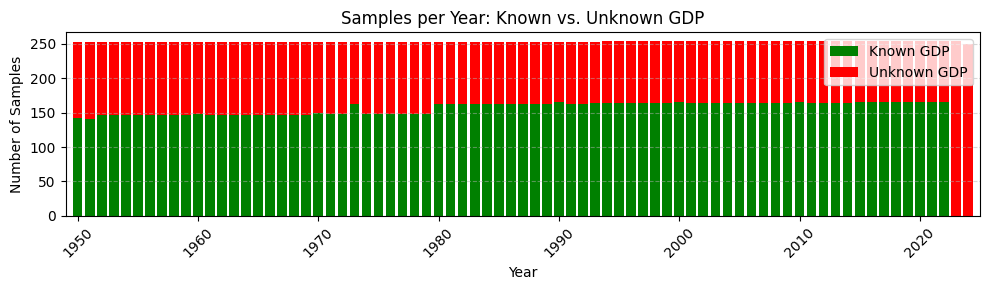

In [107]:
df_plot = df_v4.copy()
total_per_year = df_plot.groupby('year').size()

known_per_year = df_plot[df_plot['gdp'].notna()].groupby('year').size()
years = total_per_year.index
known_per_year = known_per_year.reindex(years, fill_value=0)

unknown_per_year = total_per_year - known_per_year

plt.figure(figsize=(10, 3))

plt.bar(years, known_per_year, color='green', label='Known GDP', width=0.8)
plt.bar(years, unknown_per_year, bottom=known_per_year, color='red', label='Unknown GDP', width=0.8)

plt.xlabel('Year')
plt.ylabel('Number of Samples')
plt.title('Samples per Year: Known vs. Unknown GDP')
plt.legend()


plt.xticks(np.arange(years.min(), years.max() + 1, 10), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(years.min() - 1, years.max() + 1) 

plt.tight_layout()
plt.show()

Nos ultimos 2 anos não temos quaisquer dados sobre o gpd. portanto nao faz sentido para nós incluir estes dados na nosso projeto

In [100]:
df_v5 = df_v4[df_v4['year']<= 2022]
df_v5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18476 entries, 200 to 50404
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         18476 non-null  object 
 1   year            18476 non-null  int64  
 2   iso_code        15914 non-null  object 
 3   population      16717 non-null  float64
 4   gdp             11472 non-null  float64
 5   co2             17053 non-null  float64
 6   co2_per_capita  16031 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.1+ MB


In [108]:
missing_counts = df_v5.isna().sum()                     # número
missing_pct = df_v5.isna().mean() * 100                 # percentagem

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": (missing_pct).round(2)
})

missing_summary

,missing_count,missing_pct
country,0,0.00
year,0,0.00
iso_code,2562,13.87
population,1759,9.52
gdp,7004,37.91
co2,1423,7.70
co2_per_capita,2445,13.23


OK, uma vez que o serviço spark já liderá com problemas como valores em falta, duplicados, etc não tem problema em manter... afinal, ele já irá filtrar e fazer problemas com missing values etc

---
vamos portanto guardar os dados

In [109]:
df_v4.to_csv('../data/reduced_co2.csv', index=False)

---
Nesta parte, vamos analisar um pouco os nossos dados, por curiosidade

In [110]:
df_final = df_v5.copy()
df_final.head()

,country,year,iso_code,population,gdp,co2,co2_per_capita
200,Afghanistan,1950,AFG,7776180.0,9.421400e+09,0.084,0.011
201,Afghanistan,1951,AFG,7879343.0,9.692280e+09,0.092,0.012
202,Afghanistan,1952,AFG,7987784.0,1.001732e+10,0.092,0.011
203,Afghanistan,1953,AFG,8096703.0,1.063052e+10,0.106,0.013
204,Afghanistan,1954,AFG,8207954.0,1.086636e+10,0.106,0.013


In [112]:
df_final.shape

(18476, 7)

In [113]:
df_aux = df_final.copy()
df_au = df_aux.dropna()
df_au.shape

(11237, 7)

Nós temos 11237 valores reais (pós tranformação spark), mas o dataset atualmente tem 18476 dados

In [119]:
df_final['country'].value_counts()

country
Afghanistan                73
Africa                     73
Africa (GCP)               73
Albania                    73
Algeria                    73
                           ..
Wallis and Futuna          73
Zimbabwe                   73
Yemen                      73
Ryukyu Islands (GCP)       50
Kuwaiti Oil Fires (GCP)    30
Name: count, Length: 254, dtype: int64

Temos 254 dados do country

In [120]:
df_final['co2_per_capita'].describe()

count    16031.000000
mean         5.367044
std         17.945877
min          0.000000
25%          0.450000
50%          2.104000
75%          6.612500
max        782.743000
Name: co2_per_capita, dtype: float64

In [121]:
df_final['co2'].describe()

count    17053.000000
mean       602.367842
std       2444.431936
min          0.000000
25%          0.660000
50%          7.789000
75%         85.936000
max      37527.773000
Name: co2, dtype: float64

In [ ]:
df_final['gdp'].describe()

count    1.147200e+04
mean     4.130017e+11
std      3.552073e+12
min      4.998000e+07
25%      8.479572e+09
50%      3.224005e+10
75%      1.532196e+11
max      1.301126e+14
Name: gdp, dtype: float64

In [ ]:
co2_per_country = df_final.groupby('country')['co2'].mean().sort_values(ascending=False).head(10)
print("Top 10 países com maior média de CO2:")
print(co2_per_country)

Top 10 países com maior média de CO2 no df_final:
country
World                            21184.541548
High-income countries            12499.386329
OECD (GCP)                       10497.665575
Non-OECD (GCP)                   10089.584795
Asia                              7771.370260
Asia (GCP)                        6759.832904
Upper-middle-income countries     6517.808658
Europe                            5886.515479
Europe (GCP)                      5886.515438
North America                     5380.529425
Name: co2, dtype: float64


In [ ]:
cols = ["population", "gdp", "co2", "co2_per_capita"]
corr = df_final[cols].corr()
print("Correlação entre variáveis:")
print(corr)

Correlação entre variáveis no df_final:
                population       gdp       co2  co2_per_capita
population        1.000000  0.918294  0.883774       -0.012786
gdp               0.918294  1.000000  0.968149        0.053257
co2               0.883774  0.968149  1.000000        0.026098
co2_per_capita   -0.012786  0.053257  0.026098        1.000000


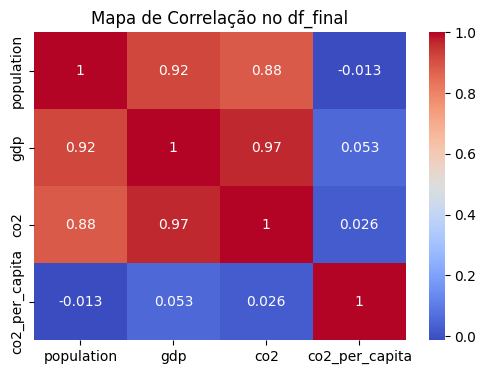

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

Perguntas que nos parecem interessantes fazer com base na nossa análise:

How has global CO2 increased over the years?
What was the growth rate year-over-year?
Did emissions drop during wars, recessions, or COVID?

Top polluters by total: USA, China, India, Russia?
Top polluters per capita: Qatar, Kuwait, UAE?
Who improved? Who got worse?

Does more GDP = more CO2?
Are rich countries more efficient (lower CO2 per capita)?
Can countries grow economically while reducing emissions?